In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import xgboost as xgb

In [6]:
boston_data = load_boston()

In [7]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
data = boston_data.data

In [14]:
target = boston_data.target

In [15]:
data.shape

(506, 13)

In [16]:
target.shape

(506,)

In [17]:
X = pd.DataFrame(data, columns=[boston_data.feature_names])

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
y = target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=123)

In [21]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [24]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [25]:
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
pred = xgb_model.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"The RMSE is: {rmse}")

The RMSE is: 10.462771233627953


# A better approach since the sample size is small is to use CV

In [29]:
params = {"objective":"reg:squarederror", "colsample_bytree":0.3, "learning_rate":0.1, "max_depth":5, "alpha":10}

In [30]:
cv_result = xgb.cv(dtrain=data_matrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

In [31]:
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [32]:
print((cv_result["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


# Visualizing the model

In [37]:
import matplotlib.pyplot as plt

In [38]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)

In [47]:
#xgb.plot_tree(xg_reg, num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

# Feature Engineering -- Selection

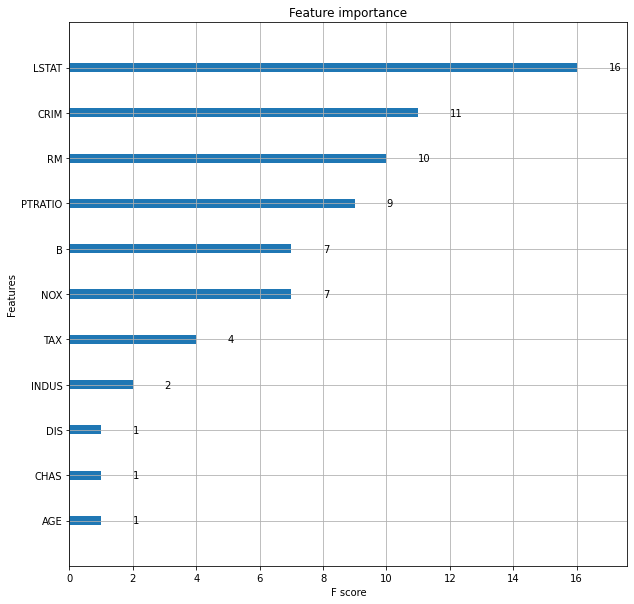

In [45]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [48]:
# Building MOdel Based the selected Features

In [51]:
lst = ['LSTAT', 'CRIM', 'RM', 'PTRATIO', 'B', 'NOX']
features = X[lst]

In [52]:
features.head()

,LSTAT,CRIM,RM,PTRATIO,B,NOX
0,4.98,0.00632,6.575,15.3,396.90,0.538
1,9.14,0.02731,6.421,17.8,396.90,0.469
2,4.03,0.02729,7.185,17.8,392.83,0.469
3,2.94,0.03237,6.998,18.7,394.63,0.458
4,5.33,0.06905,7.147,18.7,396.90,0.458


In [53]:
label = y

In [54]:
d_matrix = xgb.DMatrix(data=features, label=label)

In [55]:
cv_model = xgb.cv(dtrain=data_matrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

In [56]:
cv_model.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [57]:
print((cv_model["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64
